In [1]:
cd ..

C:\Users\ADMIN\Desktop


In [2]:
cd ..

C:\Users\ADMIN


In [3]:
cd downloads

C:\Users\ADMIN\downloads


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [6]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-train

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
Generator = ImageDataGenerator()

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [9]:
train_gen

In [10]:
next(train_gen)

(array([[[[ 59.,  52.,  46.],
          [ 52.,  52.,  40.],
          [ 59.,  55.,  46.],
          ...,
          [ 21.,  23.,  18.],
          [ 38.,  40.,  35.],
          [ 54.,  56.,  51.]],
 
         [[ 67.,  65.,  66.],
          [ 56.,  49.,  43.],
          [ 74.,  70.,  61.],
          ...,
          [ 42.,  44.,  39.],
          [ 23.,  25.,  20.],
          [ 27.,  29.,  24.]],
 
         [[ 70.,  65.,  61.],
          [ 58.,  53.,  47.],
          [ 83.,  69.,  66.],
          ...,
          [ 38.,  39.,  34.],
          [ 29.,  30.,  24.],
          [ 42.,  44.,  31.]],
 
         ...,
 
         [[ 54.,  41.,  25.],
          [ 56.,  49.,  31.],
          [ 57.,  52.,  33.],
          ...,
          [180., 182., 179.],
          [180., 181., 176.],
          [175., 176., 171.]],
 
         [[ 58.,  45.,  29.],
          [ 58.,  45.,  29.],
          [ 58.,  49.,  32.],
          ...,
          [179., 179., 179.],
          [178., 178., 176.],
          [174., 175., 169.

In [11]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


Text(0.5, 1.0, '1.0')

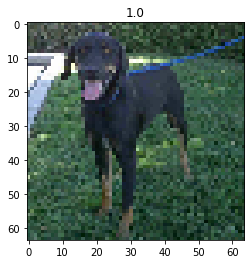

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_batch[0].astype('int32'))
plt.title(y_batch[0])

In [13]:
x_batch.max()

255.0

In [14]:
Generator = ImageDataGenerator(rescale=1/255.)

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [15]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


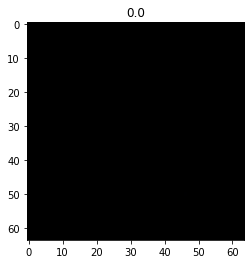

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i].astype('int32'))
  plt.title(y_batch[i])

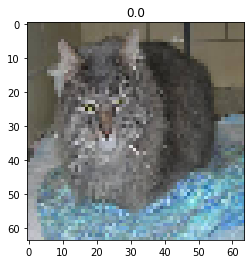

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

In [18]:
x_batch.max()

1.0

In [19]:
new2_model = tf.keras.models.load_model('iris_2-26.h5')

In [38]:
new2_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = new2_model.fit(train_gen, epochs=1000, steps_per_epoch=len(train_gen))

Epoch 1/1000
782/782 [==============================] - 152s 194ms/step - loss: 0.3949 - binary_accuracy: 0.8194
Epoch 2/1000
782/782 [==============================] - 133s 169ms/step - loss: 0.3855 - binary_accuracy: 0.8236
Epoch 3/1000
782/782 [==============================] - 138s 176ms/step - loss: 0.3778 - binary_accuracy: 0.8300
Epoch 4/1000
782/782 [==============================] - 132s 169ms/step - loss: 0.3646 - binary_accuracy: 0.8354
Epoch 5/1000
782/782 [==============================] - 132s 168ms/step - loss: 0.3565 - binary_accuracy: 0.8425
Epoch 6/1000
782/782 [==============================] - 131s 168ms/step - loss: 0.3493 - binary_accuracy: 0.8451
Epoch 7/1000
782/782 [==============================] - 132s 168ms/step - loss: 0.3292 - binary_accuracy: 0.8552
Epoch 8/1000
782/782 [==============================] - 131s 168ms/step - loss: 0.3262 - binary_accuracy: 0.8566
Epoch 9/1000
782/782 [==============================] - 131s 168ms/step - loss: 0.3111 - binary_

782/782 [==============================] - 52s 67ms/step - loss: 0.0739 - binary_accuracy: 0.9782
Epoch 74/1000
782/782 [==============================] - 51s 65ms/step - loss: 0.0988 - binary_accuracy: 0.9713
Epoch 75/1000
782/782 [==============================] - 53s 68ms/step - loss: 0.0320 - binary_accuracy: 0.9895
Epoch 76/1000
782/782 [==============================] - 55s 71ms/step - loss: 0.0062 - binary_accuracy: 0.9993
Epoch 77/1000
782/782 [==============================] - 50s 64ms/step - loss: 0.0513 - binary_accuracy: 0.9836
Epoch 78/1000
782/782 [==============================] - 50s 64ms/step - loss: 0.0072 - binary_accuracy: 0.9987
Epoch 79/1000
782/782 [==============================] - 49s 62ms/step - loss: 0.0477 - binary_accuracy: 0.9882
Epoch 80/1000
782/782 [==============================] - 50s 63ms/step - loss: 0.0332 - binary_accuracy: 0.9900
Epoch 81/1000
782/782 [==============================] - 49s 62ms/step - loss: 0.0040 - binary_accuracy: 0.9997
Epoch 

KeyboardInterrupt: 

In [39]:
new2_model.save('iris_2-138.h5')

In [40]:
new2_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = new2_model.fit(train_gen, epochs=2, steps_per_epoch=len(train_gen))

Epoch 1/2
782/782 [==============================] - 62s 78ms/step - loss: 0.0591 - binary_accuracy: 0.9817
Epoch 2/2
782/782 [==============================] - 61s 78ms/step - loss: 0.0048 - binary_accuracy: 0.9994


In [41]:
new2_model.save('iris_2-140.h5')

test4

In [42]:
test_gen = Generator.flow_from_directory ('catdog', target_size=(64, 64),
                                         batch_size=32, classes=['test3'])

Found 3 images belonging to 1 classes.


In [43]:
pred = new2_model.predict(test_gen)
pred.shape

(3, 1)

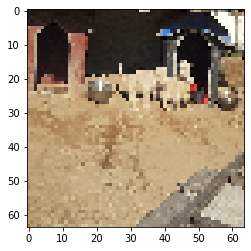

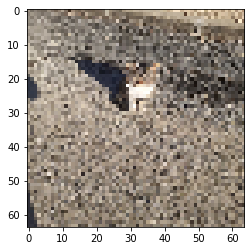

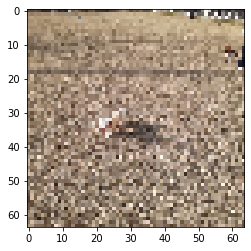

In [34]:
x_test, y_test = next(test_gen)
test_gen

for i in range(len(x_test)):
   plt.imshow(x_test[i])
   plt.show()

In [44]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(3, 64, 64, 3)
(3, 1)


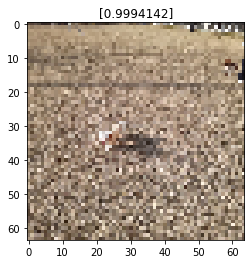

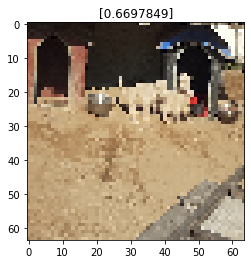

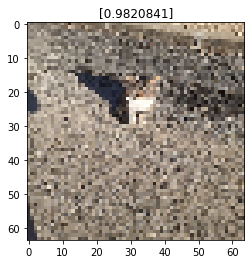

In [45]:
pred = new2_model.predict(x_test[:3])

for i in range(3):
   plt.imshow(x_test[i])
   plt.title(pred[i])
   plt.show()